In [108]:
import plotly.express as px

import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt
from google.colab import userdata

In [109]:
df = pd.read_csv('/content/drive/MyDrive/PROJECT BASED MAGANG VIRTUAL HOME CREDIT INDONESIA/Sleep_health_and_lifestyle_dataset.csv')

In [110]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [111]:
#Perintah yang digunakan dalam Pandas untuk memberikan informasi tentang DataFrame yang ada (diwakili oleh variabel df). Informasi ini termasuk:
#Jumlah total baris dan kolom dalam DataFrame.
#Tipe data dari setiap kolom.
#Jumlah nilai yang tidak null dalam setiap kolom.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [112]:
#Perintah df.isnull().sum() digunakan untuk menghitung jumlah nilai yang hilang (null) dalam setiap kolom dari DataFrame yang diberikan (diwakili oleh variabel df).
#Ini berguna untuk mengetahui seberapa banyak data yang hilang dalam setiap kolom, yang kemudian dapat membantu dalam pengambilan keputusan tentang bagaimana menangani nilai yang hilang tersebut.

df.isnull().sum()



Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [113]:


print( df['Occupation'].value_counts() ); print( "\n\n")
print( df['BMI Category'].value_counts() ); print( "\n\n")
print( df['Sleep Disorder'].value_counts() )



Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64



BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64



Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64


In [114]:
def plotly_boxplot(df, numeric_types, color, row=None):
    fig = px.box(df.melt(id_vars=[col for col in df.columns if col not in numeric_types],
                         value_vars=numeric_types,
                         var_name='key',
                         value_name='value'),
                 x="key", y="value",
                 facet_col="key", color=color,
                 facet_row=row)
    fig.update_yaxes(showticklabels=True, matches=None)
    fig.update_xaxes(showticklabels=True, matches=None)
    fig.show()

In [115]:
#Fungsi plotly_boxplot ini akan membuat box plot untuk tiga jenis data numerik yang disebutkan ("Stress Level", "Sleep Duration", dan "Quality of Sleep") dalam DataFrame df.
#Box plot akan diwarnai berdasarkan kolom "Occupation",
#yang berarti plot akan menunjukkan distribusi dan perbandingan nilai-nilai numerik tersebut di antara berbagai pekerjaan atau profesi.

plotly_boxplot(df, ["Stress Level", "Sleep Duration", "Quality of Sleep"], "Occupation")

In [116]:
#Fungsi ini menggunakan Plotly Express untuk membuat scatter plot dari dua kolom numerik dalam DataFrame.
#Argument-argument yang diterima oleh fungsi ini adalah:
#df: DataFrame yang berisi data.
#x_column: Nama kolom yang ingin Anda plot di sumbu x.
# y_column: Nama kolom yang ingin Anda plot di sumbu y.
#color: Opsional, kolom yang digunakan untuk mewarnai titik-titik scatter plot.
#row: Opsional, kolom yang digunakan untuk membuat subplot berdasarkan nilai dalam kolom tersebut.
#col: Opsional, kolom yang digunakan untuk membuat subplot berdasarkan nilai dalam kolom tersebut.



def plotly_scatter(df, x_column, y_column, color=None, row=None, col=None):
    # Membuat scatter plot dengan Plotly Express
    fig = px.scatter(df, x=x_column, y=y_column,
                     facet_col=col, color=color,
                     facet_row=row, height=600)

    # Menampilkan plot
    fig.show()

In [117]:
plotly_scatter(df, "Age", "Sleep Duration",color="BMI Category")

<ipython-input-118-feaa85c2e408>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




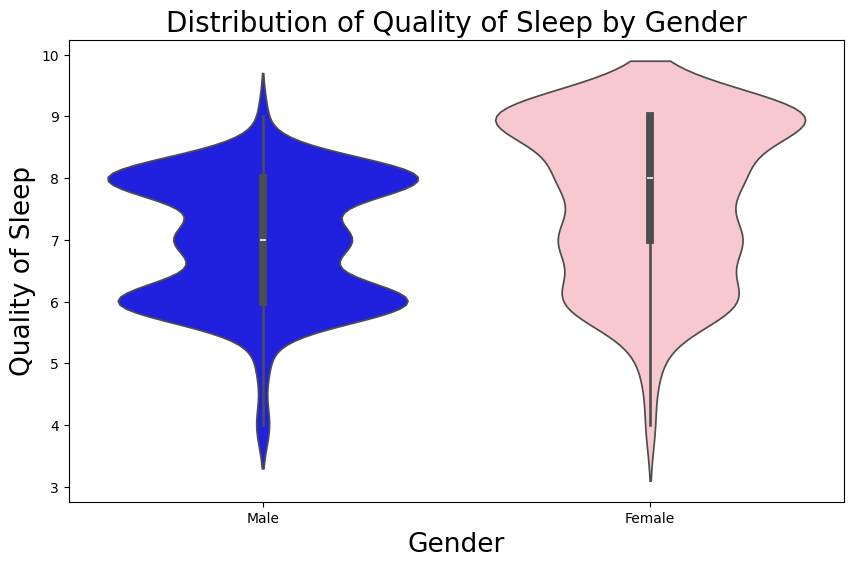

In [118]:
color_palette = {'Male': 'blue', 'Female': 'pink'}
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='Quality of Sleep', data=df, palette=color_palette)
plt.title('Distribution of Quality of Sleep by Gender', fontsize=20)
plt.xlabel('Gender', fontsize=19)
plt.ylabel('Quality of Sleep', fontsize=19)
plt.show()

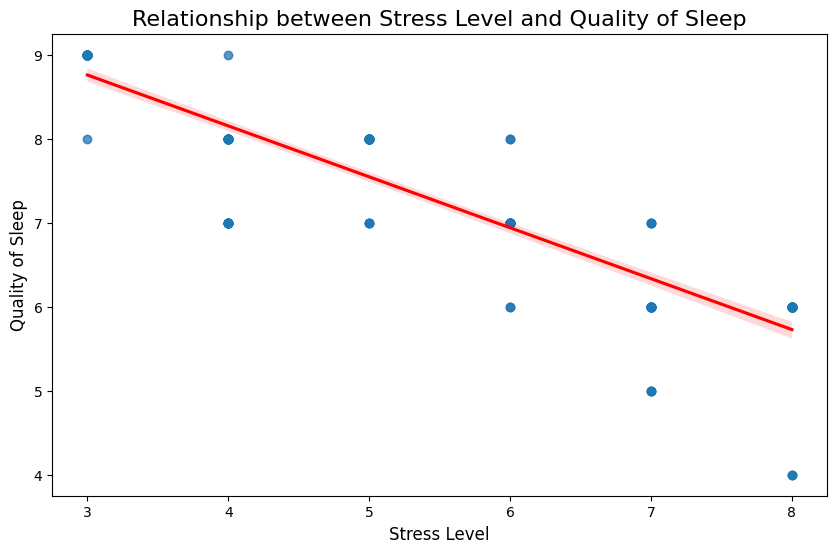

In [119]:
# sns.regplot() digunakan untuk membuat scatter plot dengan garis regresi yang menunjukkan tren hubungan antara tingkat stres dan kualitas tidur.
#Argumen scatter_kws={'alpha':0.5} digunakan untuk mengatur transparansi titik-titik scatter plot,
#sementara line_kws={'color':'red'} digunakan untuk mengatur warna garis regresi menjadi merah.


plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Stress Level', y='Quality of Sleep', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Relationship between Stress Level and Quality of Sleep', fontsize=16)
plt.xlabel('Stress Level', fontsize=12)
plt.ylabel('Quality of Sleep', fontsize=12)
plt.show()

In [120]:
#Fungsi plotly_boxplot ini bertujuan untuk membuat box plot menggunakan Plotly,
# membandingkan distribusi dari dua variabel numerik ('Stress Level' dan 'Sleep Duration')
#dengan membaginya berdasarkan kategori 'Quality of Sleep'.

#Argumen-argumen fungsi tersebut adalah:

    #df: DataFrame yang berisi data.
    #numerical_columns: Daftar nama kolom yang berisi variabel numerik yang ingin dibandingkan.
    #color_column: Nama kolom yang akan digunakan untuk membedakan warna box plot berdasarkan kategori 'Quality of Sleep'.

#Fungsi ini akan menghasilkan plot interaktif yang memungkinkan Anda untuk melihat distribusi variabel numerik tersebut dalam kategori 'Quality of Sleep'. Dengan demikian, Anda dapat memahami bagaimana variabel numerik tersebut berkorelasi dengan kategori 'Quality of Sleep'.

plotly_boxplot(df, ["Stress Level", "Sleep Duration"], "Quality of Sleep")

DATA PREPROCESSING

In [121]:
# Memisahkan kolom 'Blood Pressure' menjadi dua kolom terpisah
df[['BloodPressure_Upper', 'BloodPressure_Lower']] = df['Blood Pressure'].str.split('/', expand=True)

# Mengonversi kedua kolom menjadi tipe data float
df['BloodPressure_Upper'] = pd.to_numeric(df['BloodPressure_Upper'], errors='coerce')
df['BloodPressure_Lower'] = pd.to_numeric(df['BloodPressure_Lower'], errors='coerce')

# Menghapus kolom 'Blood Pressure' yang sudah terpisah
df.drop(columns=['Blood Pressure'], inplace=True)

# Menampilkan lima baris pertama dataset setelah preprocessing
print(df.head())

   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

   Heart Rate  Daily Steps Sleep Disorder  BloodPressure_Upper  \
0          77         4200            NaN                  126   
1          75       

In [122]:
#LabelEncoder digunakan untuk mengonversi variabel kategori menjadi bilangan bulat.
#Setiap kategori akan diubah menjadi bilangan bulat yang unik.
# Ini membantu dalam pemrosesan lebih lanjut seperti pemodelan menggunakan algoritma machine learning yang membutuhkan input dalam bentuk numerik.
#Setelah variabel kategori dikodekan, DataFrame ditampilkan dengan lima baris pertama menggunakan df.head().


from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

# Mengonversi variabel kategori menjadi bilangan bulat
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
df['BMI Category'] = label_encoder.fit_transform(df['BMI Category'])
df['Sleep Disorder'] = label_encoder.fit_transform(df['Sleep Disorder'])

# Menampilkan lima baris pertama dataset setelah preprocessing
print(df.head())

   Person ID  Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
0          1       1   27           9             6.1                 6   
1          2       1   28           1             6.2                 6   
2          3       1   28           1             6.2                 6   
3          4       1   28           6             5.9                 4   
4          5       1   28           6             5.9                 4   

   Physical Activity Level  Stress Level  BMI Category  Heart Rate  \
0                       42             6             3          77   
1                       60             8             0          75   
2                       60             8             0          75   
3                       30             8             2          85   
4                       30             8             2          85   

   Daily Steps  Sleep Disorder  BloodPressure_Upper  BloodPressure_Lower  
0         4200               2                  126  

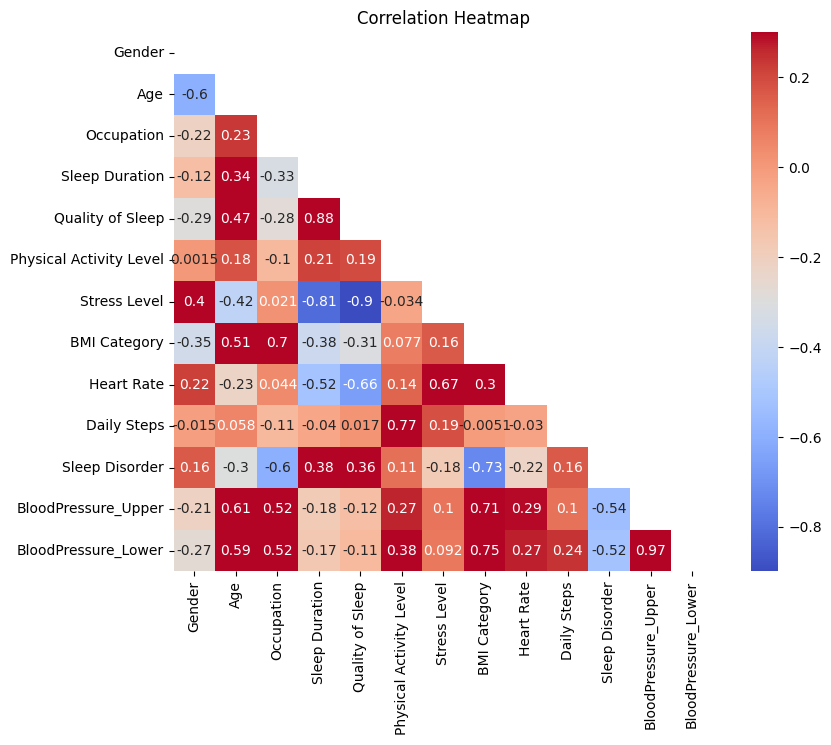

In [123]:
def corr_vis(corr):
    # Membuat maskara untuk setengah bagian atas dari heatmap
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Membuat plot heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(corr, mask=mask, vmax=0.3, square=True, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

# Menghitung korelasi antar fitur
num_corr = df.drop('Person ID', axis=1).corr()

# Visualisasi heatmap korelasi
corr_vis(num_corr)

In [124]:
plotly_boxplot(df, ["BloodPressure_Upper", "BloodPressure_Lower"], "Quality of Sleep")

In [125]:
#model Logistic Regression, Random Forest Classifier, dan Gradient Boosting Classifier untuk melakukan klasifikasi pada data UNTUK CODE:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc

# Prepare the data
X = df.drop(['Person ID', 'Sleep Disorder'], axis=1)
y = df['Sleep Disorder']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the models
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_scaled, y_train)


GradientBoostingClassifier()

In [126]:
# Create the models
lr_d = LogisticRegression()

# Fit the models
lr_d.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

Prediction and Report

In [131]:
#Matplotlib untuk membuat bar plot dari metrik presisi, recall, dan F1-score untuk setiap kelas.
#Setiap kelas direpresentasikan sebagai sumbu x, sedangkan nilai metrik direpresentasikan sebagai sumbu y.

def plot_classification_report(report, title):
    lines = report.split('\n')[2:-5]
    classes = []
    precision = []
    recall = []
    f1_score = []
    for line in lines:
        row_data = line.split()
        classes.append(row_data[0])
        precision.append(float(row_data[1]))
        recall.append(float(row_data[2]))
        f1_score.append(float(row_data[3]))

    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(classes, precision, color='skyblue', label='Precision')
    plt.bar(classes, recall, color='lightgreen', label='Recall')
    plt.bar(classes, f1_score, color='salmon', label='F1-Score')
    plt.xlabel('Class')
    plt.ylabel('Score')
    plt.title(title)
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()




In [134]:
lr_pred_d = lr_d.predict(X_test)

[ Logistic Regression report ]

              precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       1.00      0.83      0.91        18
           2       0.86      1.00      0.92        42

    accuracy                           0.91        75
   macro avg       0.95      0.86      0.89        75
weighted avg       0.92      0.91      0.90        75



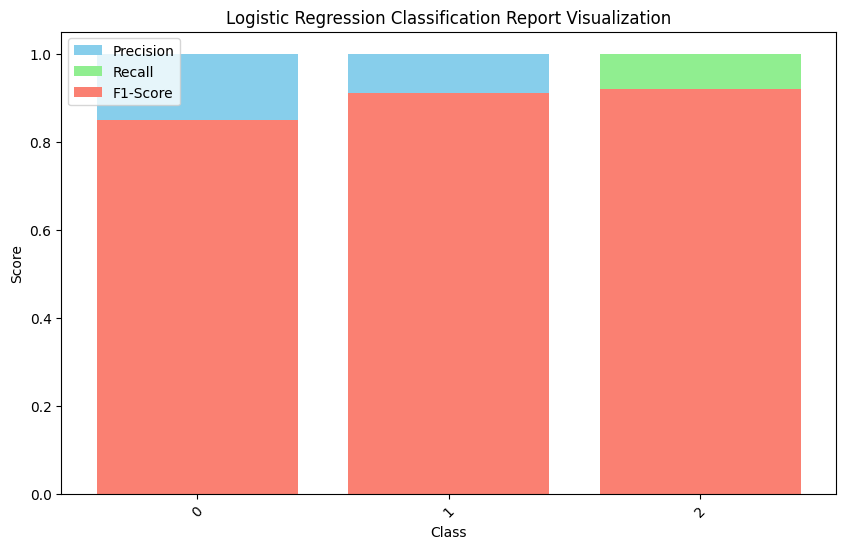

In [133]:
#Setelah mendapatkan laporan klasifikasi dari algoritma Logistic Regression (lr_d_report),
# Menampilkan laporan tersebut dan kemudian memanggil fungsi plot_classification_report
#untuk memvisualisasikan laporan klasifikasi menggunakan bar plot.



def plot_classification_report(report, title):
    lines = report.split('\n')[2:-5]
    classes = []
    precision = []
    recall = []
    f1_score = []
    support = []
    for line in lines:
        row_data = line.split()
        classes.append(row_data[0])
        precision.append(float(row_data[1]))
        recall.append(float(row_data[2]))
        f1_score.append(float(row_data[3]))
        support.append(int(row_data[4]))

    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(classes, precision, color='skyblue', label='Precision')
    plt.bar(classes, recall, color='lightgreen', label='Recall')
    plt.bar(classes, f1_score, color='salmon', label='F1-Score')
    plt.xlabel('Class')
    plt.ylabel('Score')
    plt.title(title)
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

# Classification reports for different algorithms
lr_d_report = classification_report(y_test, lr_pred_d)

# Plot classification reports
print("[ Logistic Regression report ]\n")
print(lr_d_report)
plot_classification_report(lr_d_report, "Logistic Regression Classification Report Visualization")